# **Unsupervised Learning: Hierarchical Clustering (BaskinRobbins dataset)**
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/

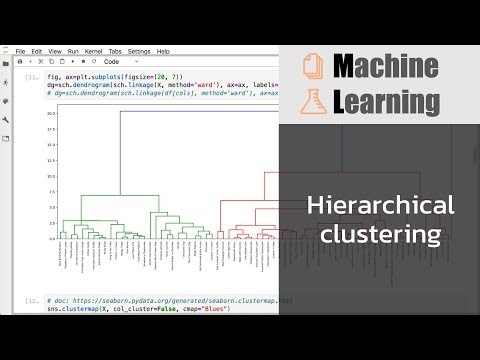

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('RjruVciZjsw', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [4]:
pd.Timestamp.now()

Timestamp('2021-05-14 05:23:08.179322')

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
12,Chocolate Chip,240,15.0,0.5,23,18,5.0
13,Chocolate Chip Cookie Dough,280,15.0,0.5,31,23,5.0
57,Salty Caramel,160,8.0,0.3,18,15,3.0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0
40,Old Fashioned Butter Pecan,260,18.0,0.4,20,16,5.0
21,Easter Egg Hunt,180,11.0,0.4,21,17,2.0
20,Cotton Candy,240,12.0,0.4,31,20,4.0
38,Mom’s Makin Cookies,190,9.0,0.2,24,18,2.0
51,Raspberry Cheese Louise,220,9.0,0.3,30,24,5.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


## **Scikit-learn: Hierarchical Clustering**

In [7]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # draw dendrogram

In [8]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

In [9]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [10]:
X=pd.DataFrame(mat, columns=cols)
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


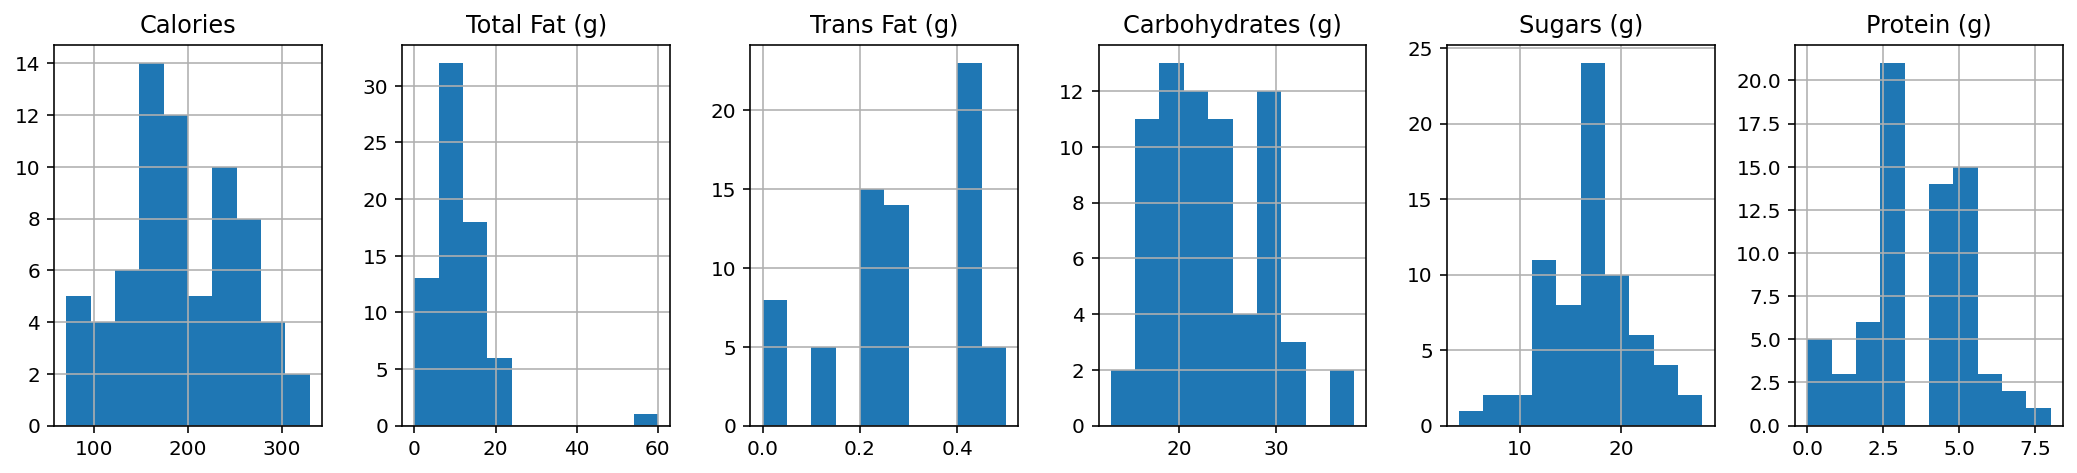

In [11]:
df[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

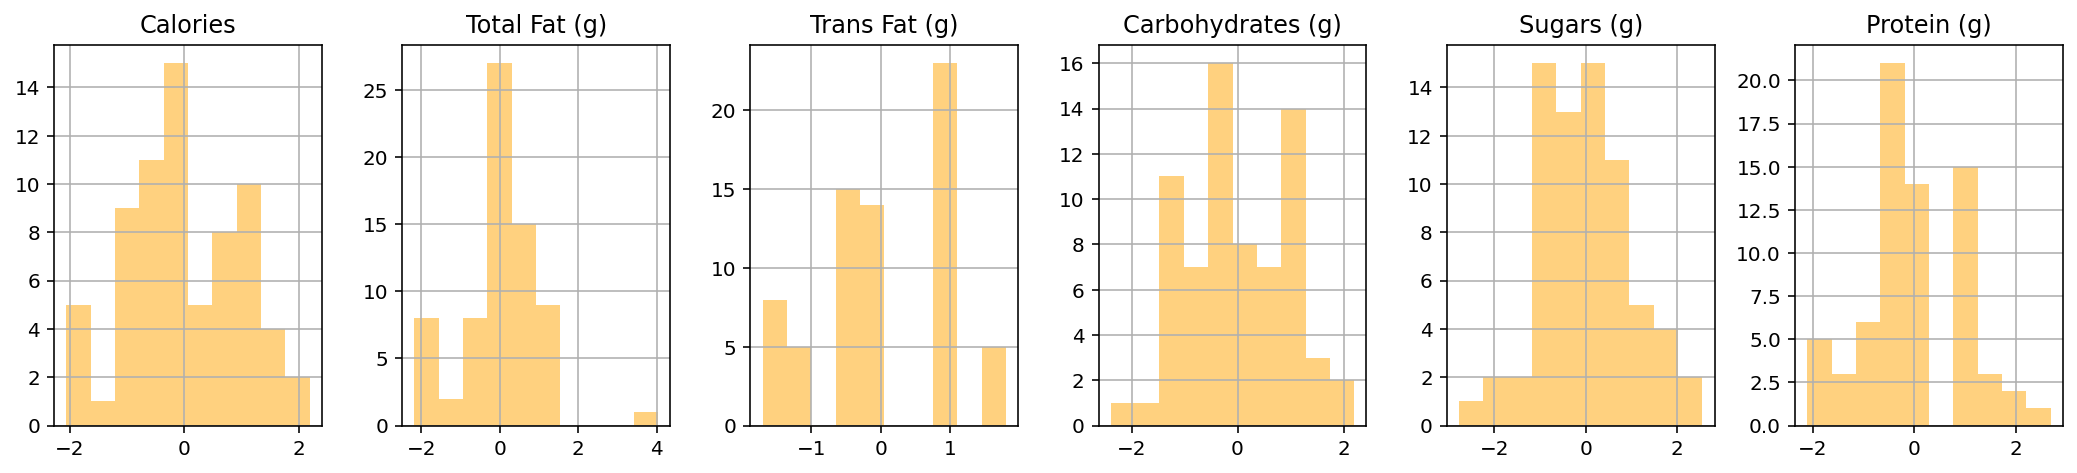

In [12]:
X[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

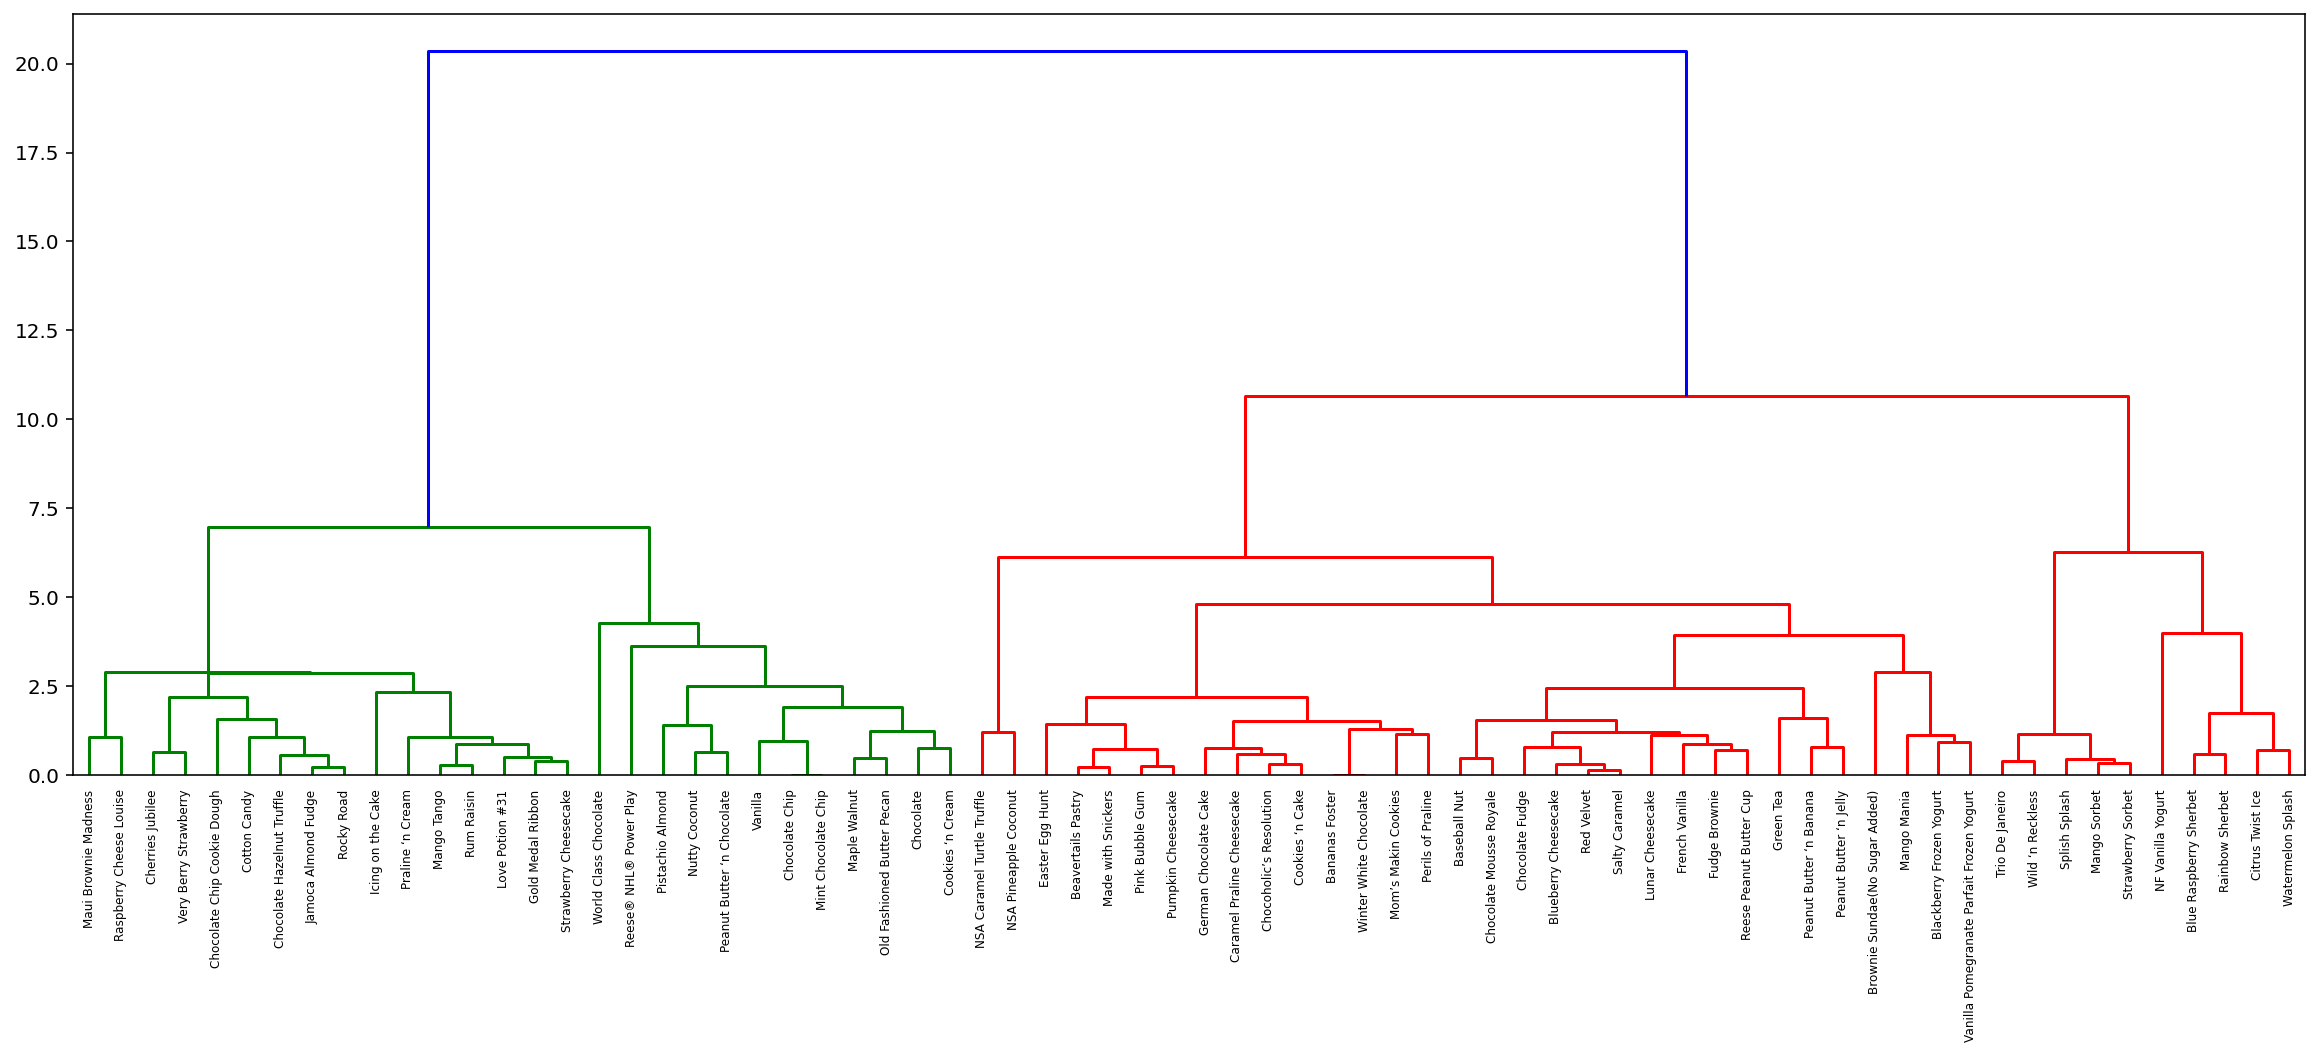

In [13]:
fig, ax=plt.subplots(figsize=(20, 7))
dg=sch.dendrogram(sch.linkage(X, method='ward'), ax=ax, labels=df['Flavour'].values)
# dg=sch.dendrogram(sch.linkage(df[cols], method='ward'), ax=ax)

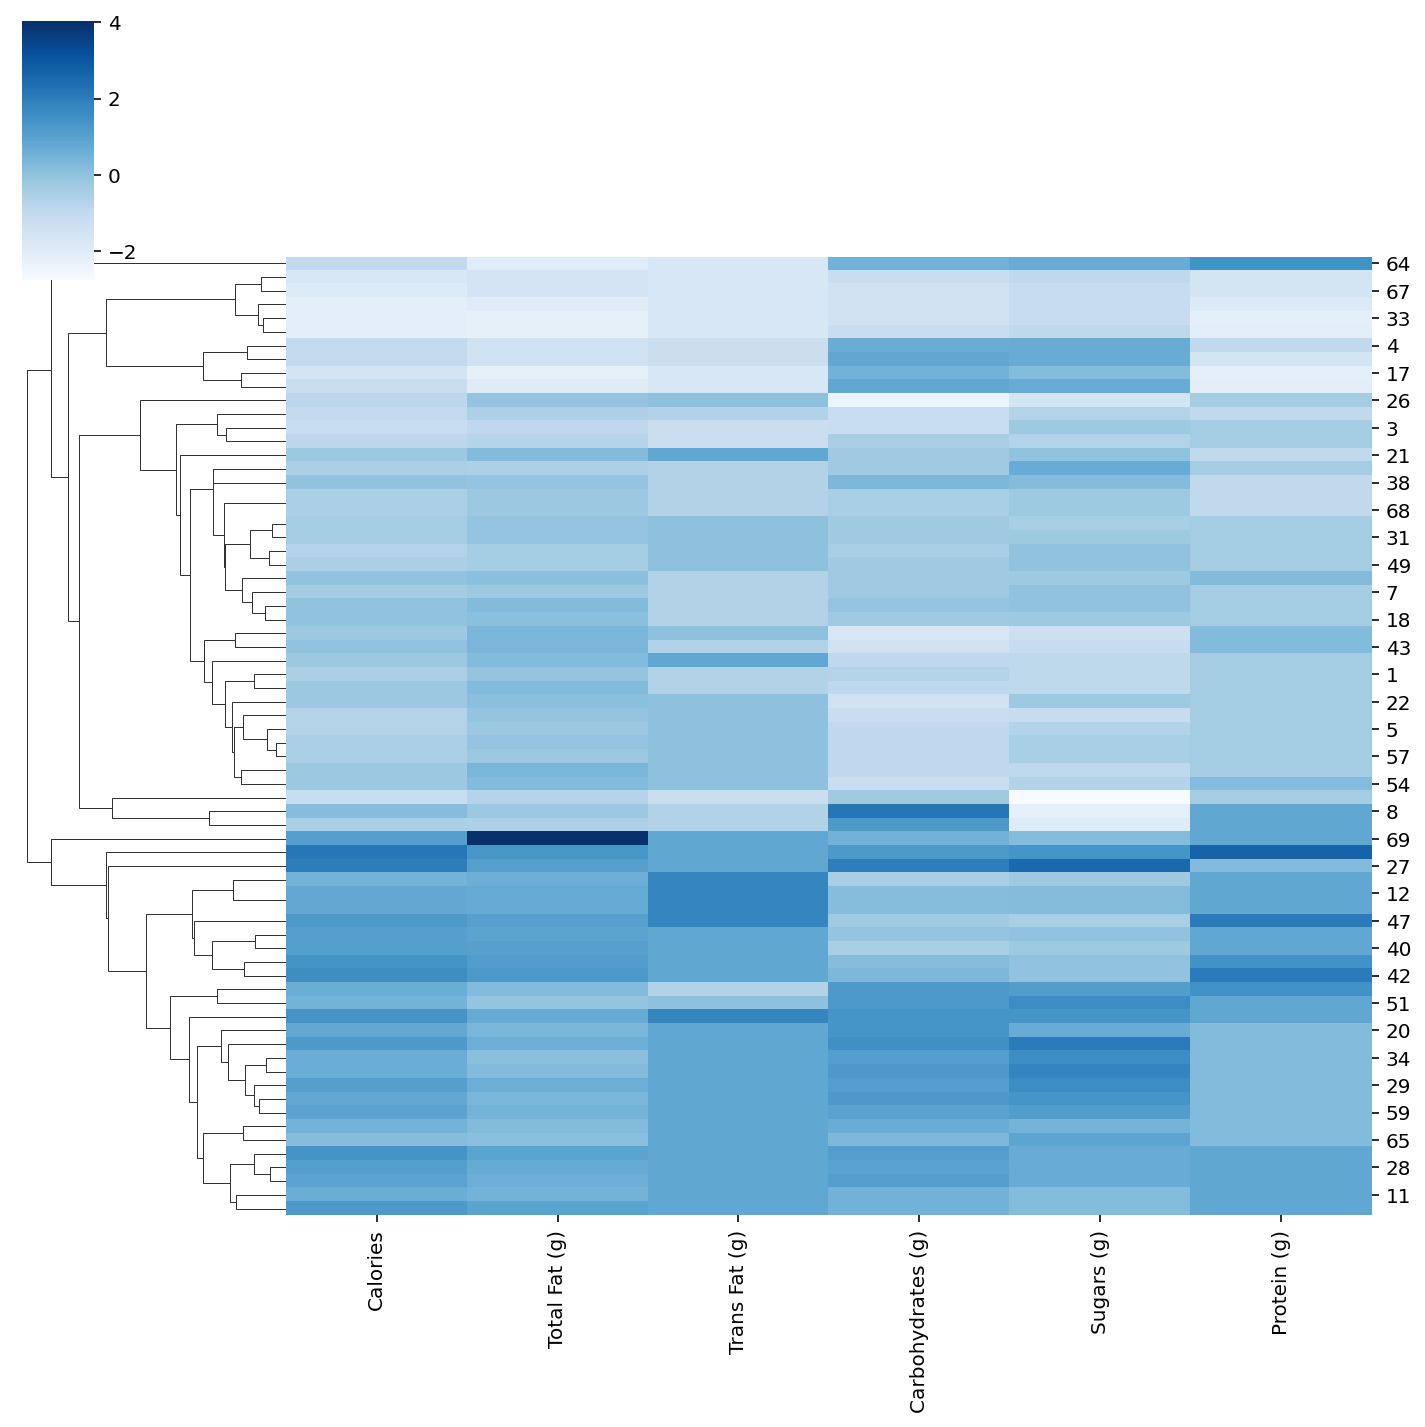

In [14]:
# doc: https://seaborn.pydata.org/generated/seaborn.clustermap.html
sns.clustermap(X, col_cluster=False, cmap="Blues")

In [15]:
hc=AgglomerativeClustering(n_clusters=2, linkage='ward')
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [16]:
hc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [17]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1])

In [18]:
df['cluster']=hc.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


In [19]:
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,0
54,Reese Peanut Butter Cup,180,11.0,0.3,17,14,4.0,0
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0,0
29,Love Potion #31,260,14.0,0.4,29,24,4.0,1
36,Maui Brownie Madness,230,11.0,0.2,30,22,6.0,1
59,Strawberry Cheesecake,250,13.0,0.4,28,22,4.0,1
66,Watermelon Splash,120,0.5,0.0,27,20,0.1,0
56,Rum Raisin,230,11.0,0.4,30,25,4.0,1
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
10,Chocoholic’s Resolution,190,11.0,0.2,22,17,3.0,0


In [20]:
df.groupby('cluster').agg(['count', 'mean', 'median']).T

cluster                            0           1
Calories          count    42.000000   28.000000
                  mean    149.761905  254.642857
                  median  160.000000  255.000000
Total Fat (g)     count    42.000000   28.000000
                  mean      6.819048   16.178571
                  median    8.000000   14.500000
Trans Fat (g)     count    42.000000   28.000000
                  mean      0.190476    0.407143
                  median    0.200000    0.400000
Carbohydrates (g) count    42.000000   28.000000
                  mean     20.238095   26.892857
                  median   20.000000   28.000000
Sugars (g)        count    42.000000   28.000000
                  mean     14.571429   20.428571
                  median   15.000000   20.000000
Protein (g)       count    42.000000   28.000000
                  mean      2.635714    4.964286
                  median    3.000000    5.000000

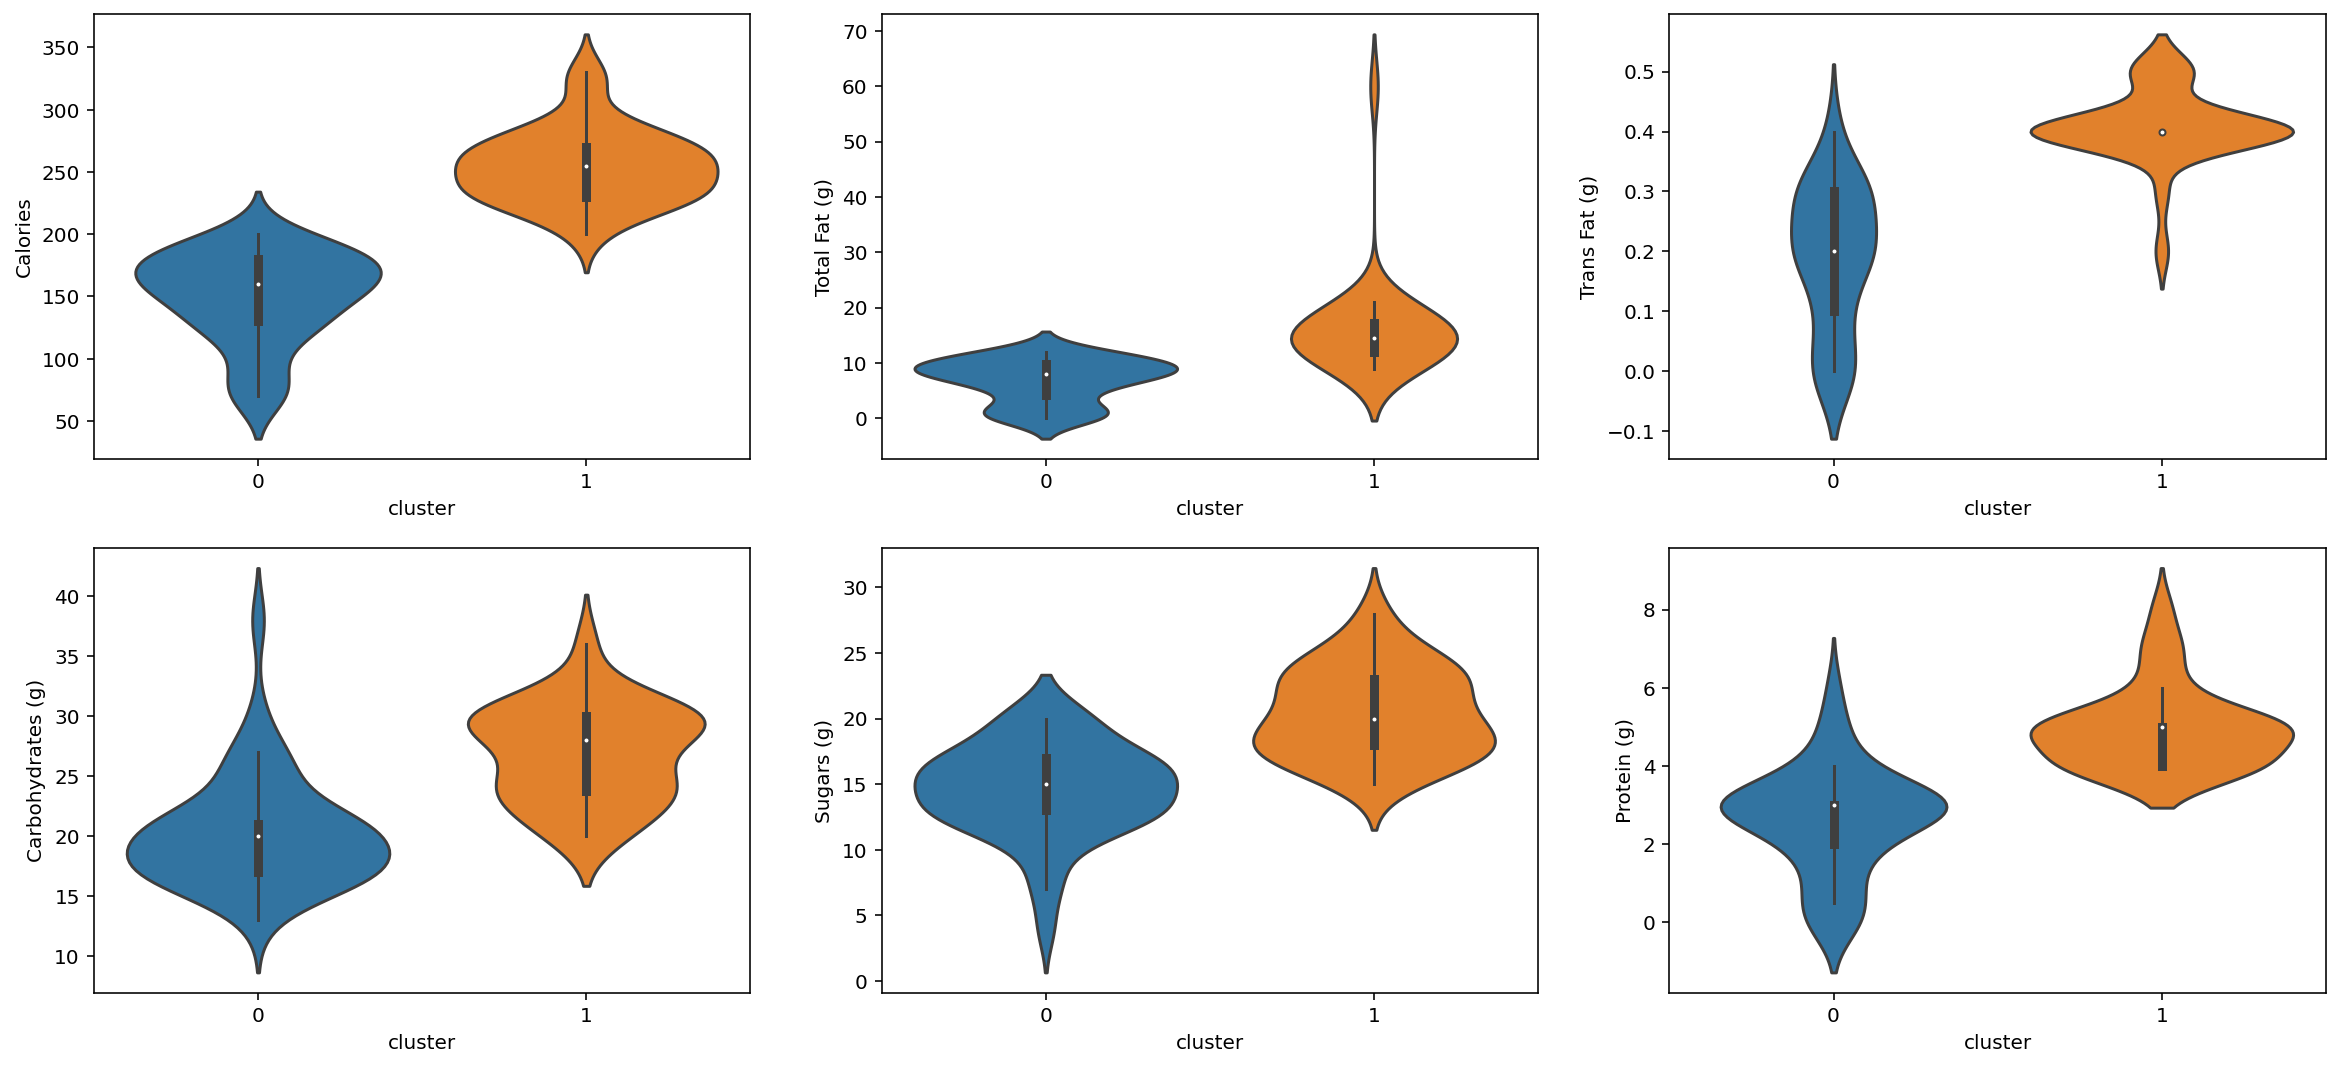

In [21]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

In [22]:
dx=X
dx['cluster']=hc.labels_

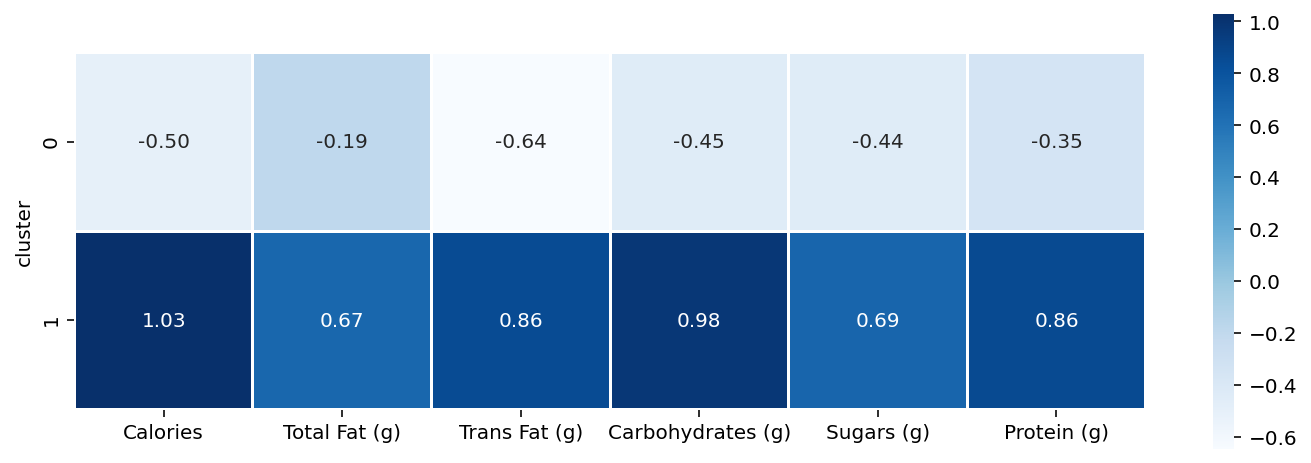

In [23]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax);

In [24]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1


## **Scikit-learn: KMeans Clustering**

In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=2)
model
# X=df[cols]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int32)

In [29]:
df['cluster_kmeans']=model.labels_

In [30]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,cluster_kmeans
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0,0
